# Custom Configuration

In [1]:
from rockpool import (
    TSEvent,
    TSContinuous,
)

from rockpool.devices.dynapse import (
    DynapSE1Jax,
    DynapSE1NeuronSynapseJax,
    DynapSE1Layout,
    DPIParameters,
    SynapseParameters,
    FeedbackParameters,
    MembraneParameters,
    AHPParameters,
    NMDAParameters,
    AMPAParameters,
    GABAAParameters,
    GABABParameters,
    DynapSE1SimulationConfiguration,
    random_spike_train,
    step_pwl,
)

import numpy as np
import jax.numpy as jnp

# - Configuration of plots
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [12, 4]
plt.rcParams['figure.dpi'] = 300

/home/ugurc/anaconda3/envs/synsense/lib/python3.8/site-packages/samna
finished bindings


In [2]:
# Visualisation Utility
def plot_out(output_spikes, name="Output Spikes", *args, **kwargs):

    out = TSEvent.from_raster(
        output_spikes, 
        dt=dt, 
        name=name
    )

    out.plot(*args, **kwargs);
    return out

In [3]:
# layout?

layout = DynapSE1Layout(
    kappa_n=0.75, 
    kappa_p=0.66, 
    Ut=0.025, 
    Io=5e-13
)

print(layout)

DynapSE1Layout(kappa_n=0.75, kappa_p=0.66, Ut=0.025, Io=5e-13)


In [4]:
# feedback?

feedback = FeedbackParameters(
    Igain=5e-11, 
    Ith=5e-10, 
    Inorm=1e-11
)

assert feedback == FeedbackParameters()

print(feedback)

FeedbackParameters(Igain=5e-11, Ith=5e-10, Inorm=1e-11)


In [5]:
# DPIParameters?
# MembraneParameters?

mem = MembraneParameters(
    Itau=None, # Deduce from tau & layout 
    f_gain=4, 
    C=3.2e-12, 
    tau=1e-2,
    layout=layout,
    Imem=None, # Set to dark current Io
    feedback=feedback,
)

# assert mem == MembraneParameters()

print(mem)

MembraneParameters(Itau=1.1347517730496453e-11, f_gain=4, C=3.2e-12, tau=0.01, layout=DynapSE1Layout(kappa_n=0.75, kappa_p=0.66, Ut=0.025, Io=5e-13), r_Cref=0.1, r_Cpulse=0.1, Imem=5e-13, feedback=FeedbackParameters(Igain=5e-11, Ith=5e-10, Inorm=1e-11))


In [6]:
# DPIParameters?
# SynapseParameters?
# AHPParameters?

ahp = AHPParameters(
    Itau=7e-12, 
    f_gain=4, 
    C=4e-11, 
    tau=None, # Deduce from Itau & layout 
    layout=layout, 
    Iw=1e-07, 
    Isyn=None, # Set to dark current Io
)

assert ahp == AHPParameters()

print(ahp)

AHPParameters(Itau=7e-12, f_gain=4, C=4e-11, tau=0.20263424518743664, layout=DynapSE1Layout(kappa_n=0.75, kappa_p=0.66, Ut=0.025, Io=5e-13), Iw=1e-07, Isyn=5e-13)


In [7]:
# DPIParameters?
# SynapseParameters?
# NMDAParameters?

nmda = NMDAParameters(
    Itau=7e-12, 
    f_gain=4, 
    C=2.8e-11, 
    tau=None, # Deduce from Itau & layout 
    layout=layout, 
    Iw=1e-07, 
    Isyn=None, # Set to dark current Io
)

assert nmda == NMDAParameters()

print(nmda)

NMDAParameters(Itau=7e-12, f_gain=4, C=2.8e-11, tau=0.14184397163120566, layout=DynapSE1Layout(kappa_n=0.75, kappa_p=0.66, Ut=0.025, Io=5e-13), Iw=1e-07, Isyn=5e-13)


In [8]:
ampa = AMPAParameters(
    Itau=7e-12, 
    f_gain=4, 
    C=2.8e-11, 
    tau=None, # Deduce from Itau & layout 
    layout=layout, 
    Iw=1e-07, 
    Isyn=None, # Set to dark current Io
)

assert ampa == AMPAParameters()

print(ampa)

AMPAParameters(Itau=7e-12, f_gain=4, C=2.8e-11, tau=0.14184397163120566, layout=DynapSE1Layout(kappa_n=0.75, kappa_p=0.66, Ut=0.025, Io=5e-13), Iw=1e-07, Isyn=5e-13)


In [9]:
gaba_a = GABAAParameters(
    Itau=7e-12, 
    f_gain=4, 
    C=2.7e-11, 
    tau=None, # Deduce from Itau & layout 
    layout=layout, 
    Iw=1e-7, # Deactivate the block 
    Isyn=None, # Set to dark current Io
)

assert gaba_a == GABAAParameters()

print(gaba_a)

GABAAParameters(Itau=7e-12, f_gain=4, C=2.7e-11, tau=0.13677811550151975, layout=DynapSE1Layout(kappa_n=0.75, kappa_p=0.66, Ut=0.025, Io=5e-13), Iw=1e-07, Isyn=5e-13)


In [10]:
gaba_b = GABABParameters(
    Itau=7e-12, 
    f_gain=4, 
    C=2.7e-11, 
    tau=None, # Deduce from Itau & layout 
    layout=layout, 
    Iw=1e-7, # Deactivate the block 
    Isyn=None, # Set to dark current Io
)

assert gaba_b == GABABParameters()

print(gaba_b)

GABABParameters(Itau=7e-12, f_gain=4, C=2.7e-11, tau=0.13677811550151975, layout=DynapSE1Layout(kappa_n=0.75, kappa_p=0.66, Ut=0.025, Io=5e-13), Iw=1e-07, Isyn=5e-13)


In [19]:
# DynapSE1Parameters?

sim_config = DynapSE1SimulationConfiguration(
    t_ref = 10e-3,
    t_pulse = 1e-5,
    fpulse_ahp = 0.1,
    Ispkthr = 1e-9,
    Ireset = None, # Set to dark current Io
    Idc = None, # Set to dark current Io
    If_nmda = None, # Set to dark current Io
    layout = layout,
    mem = mem,
    ahp = ahp,
    nmda = nmda,
    ampa = ampa,
    gaba_a = gaba_a,
    gaba_b = gaba_b,
)

print(sim_config)

Object `DynapSE1Parameters` not found.


In [12]:
# DynapSE1NeuronSynapseJax?

Nin = 3 # number of neurons
Nrec = 5
dt = 1e-3 # simulation time resolution

w_in = np.array(
       #  Gb Ga N  A
       [[[0, 0, 0, 1],  # pre = 0 (virtual) post = 0 (device)
         [0, 0, 0, 1],  #                   post = 1 (device)
         [0, 0, 0, 0],  #                   post = 2 (device)
         [0, 0, 0, 0],  #                   post = 3 (device)
         [0, 0, 0, 1]], #                   post = 4 (device)

        [[0, 0, 0, 0],  # pre = 1 (virtual)
         [0, 0, 0, 0],
         [0, 0, 1, 0],
         [0, 0, 1, 0],
         [0, 0, 0, 1]],

        [[0, 0, 0, 0],  # pre = 2 (virtual)
         [0, 0, 0, 0], 
         [0, 0, 0, 0],
         [0, 0, 0, 0],
         [0, 1, 0, 0]]], dtype=np.uint8)

# Virtual(External Input)

#     AMPA : 1 from v0 to n0, 1 from n5 to n1 1 from n5 to n4
#     NMDA : 1 from v1 to n2, 1 from n6 to n3 1 from n6 to n4
#     GABA_A: 1 from v2 to n4

w_rec = np.array(
      #  Gb Ga N  A
       [[[0, 0, 0, 0],  # pre = 0 (device)  post = 0 (device)
         [0, 0, 0, 1],  #                   post = 1 (device)
         [0, 0, 0, 0],  #                   post = 2 (device)
         [0, 0, 0, 0],  #                   post = 3 (device)
         [0, 1, 0, 0]], #                   post = 4 (device)

        [[0, 0, 0, 0],  # pre = 1 (device)
         [0, 0, 0, 0],
         [0, 0, 0, 0],
         [0, 0, 0, 0],
         [0, 0, 0, 0]],

        [[2, 0, 0, 0],  # pre = 2 (device)
         [0, 0, 0, 0],
         [0, 0, 0, 0],
         [0, 0, 0, 1],
         [0, 0, 0, 0]],

        [[0, 0, 0, 0],  # pre = 3 (device)
         [0, 0, 0, 0],
         [0, 0, 0, 1],
         [0, 0, 0, 0],
         [0, 0, 0, 0]],
       
        [[0, 0, 0, 0],  # pre = 4 (device)
         [0, 0, 0, 0],
         [0, 0, 0, 0],
         [0, 0, 0, 0],
         [0, 0, 1, 0]]], dtype=np.uint8)

# Real
#     AMPA : 1 from n0 to n1, 1 from n2 to n3, 1 from n3 to n2
#     NMDA : 1 from n4 to n4
#     GABA_A: 1 from n0 to n4
#     GABA_B: 2 from n2 to n0

modSE = DynapSE1NeuronSynapseJax(
    shape=(Nin,Nrec),
    sim_config=sim_config,
    w_in = w_in,
    w_rec = w_rec,
    dt=dt,
    rng_key=None, # Set randomly
    spiking_input=True,
    spiking_output=True,
)

print(modSE)

DynapSE1NeuronSynapseJax  with shape (3, 5)


In [13]:
T = 1
rate = 50
input_ts = random_spike_train(
    duration=T,
    n_channels=Nin,
    rate=rate,
    dt=dt,
    name='Input Spike Train',
)

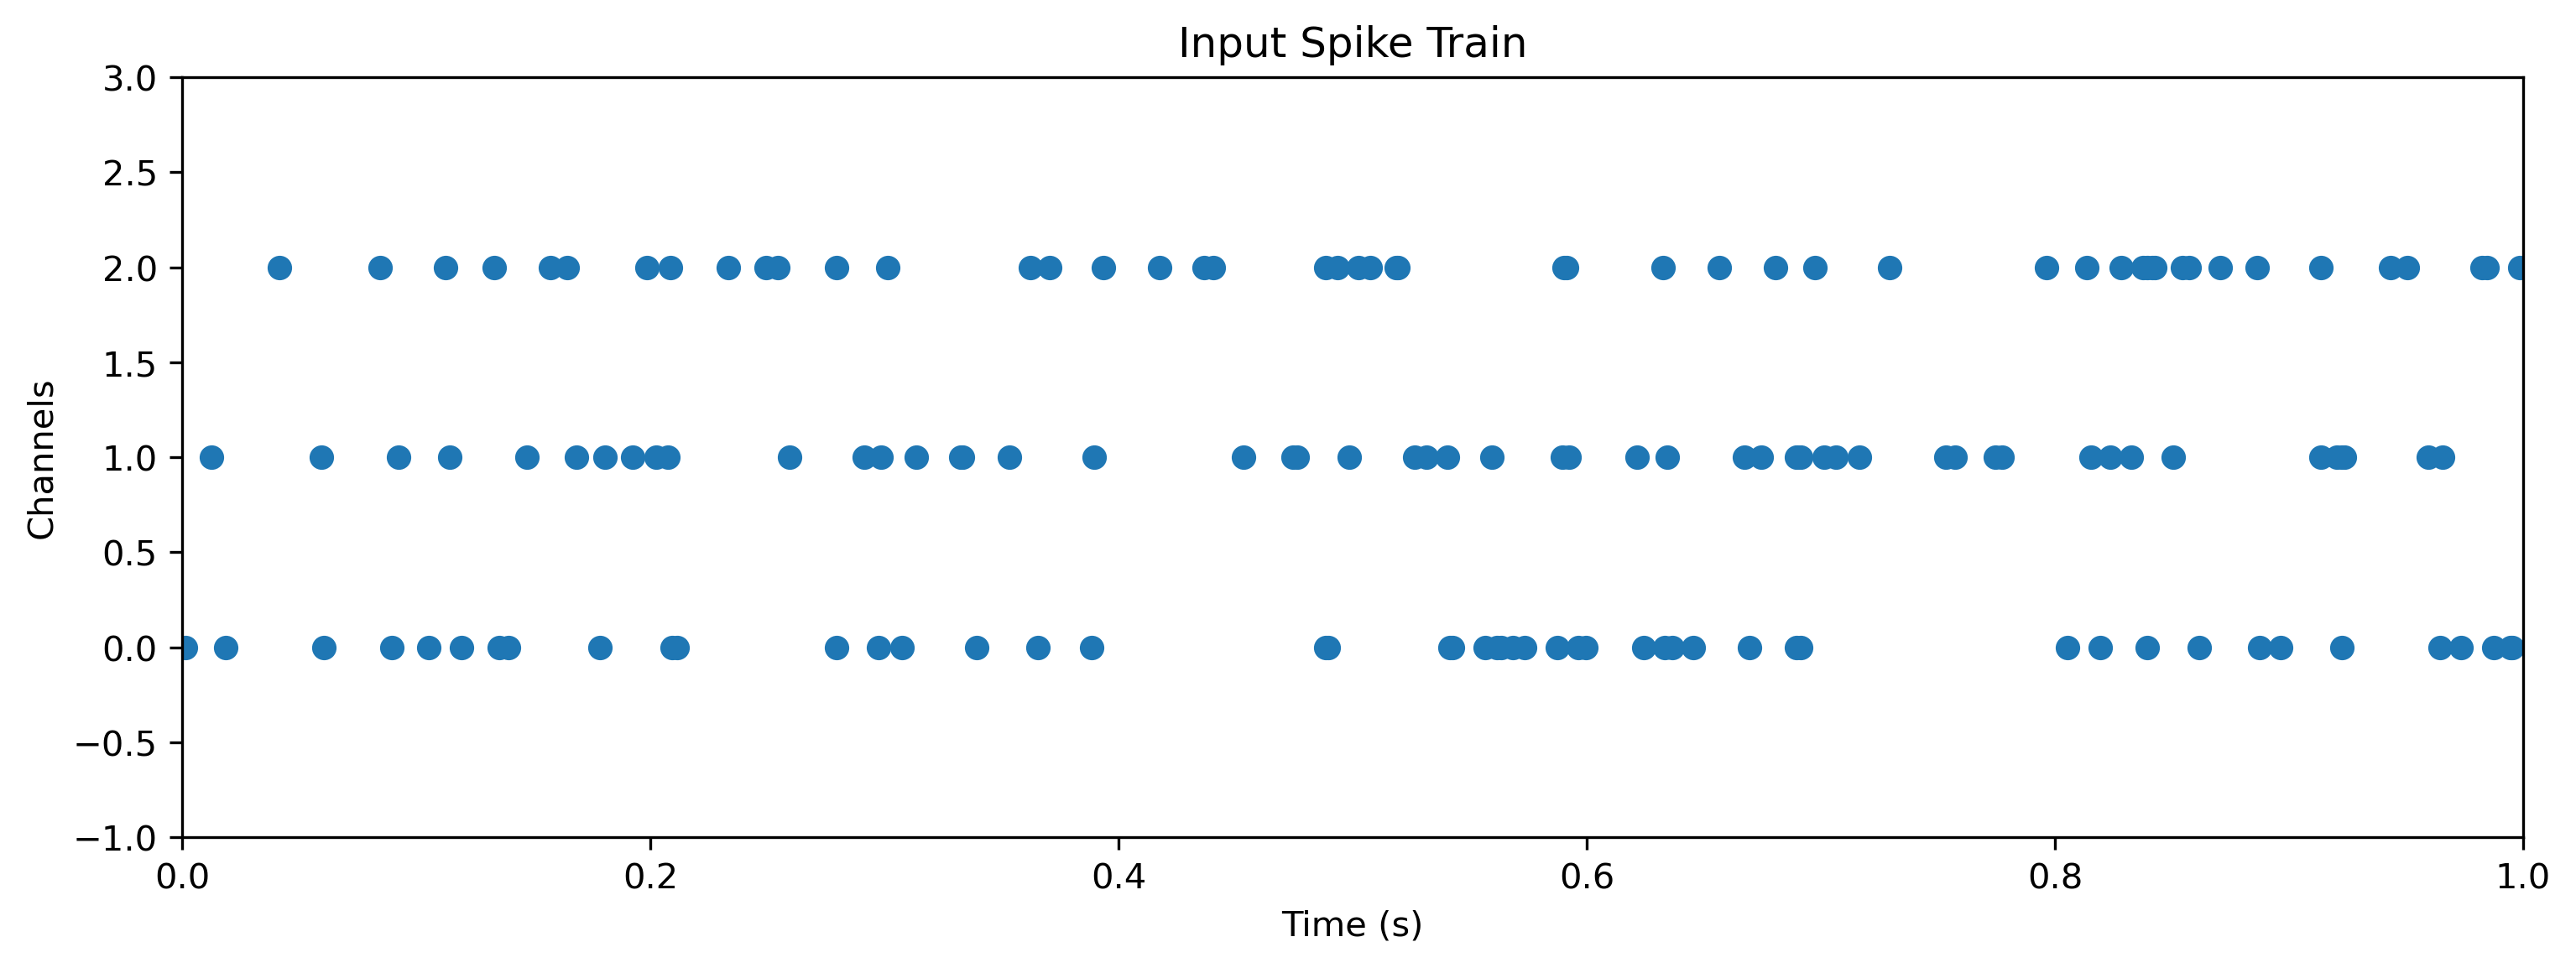

In [14]:
input_ts.plot();

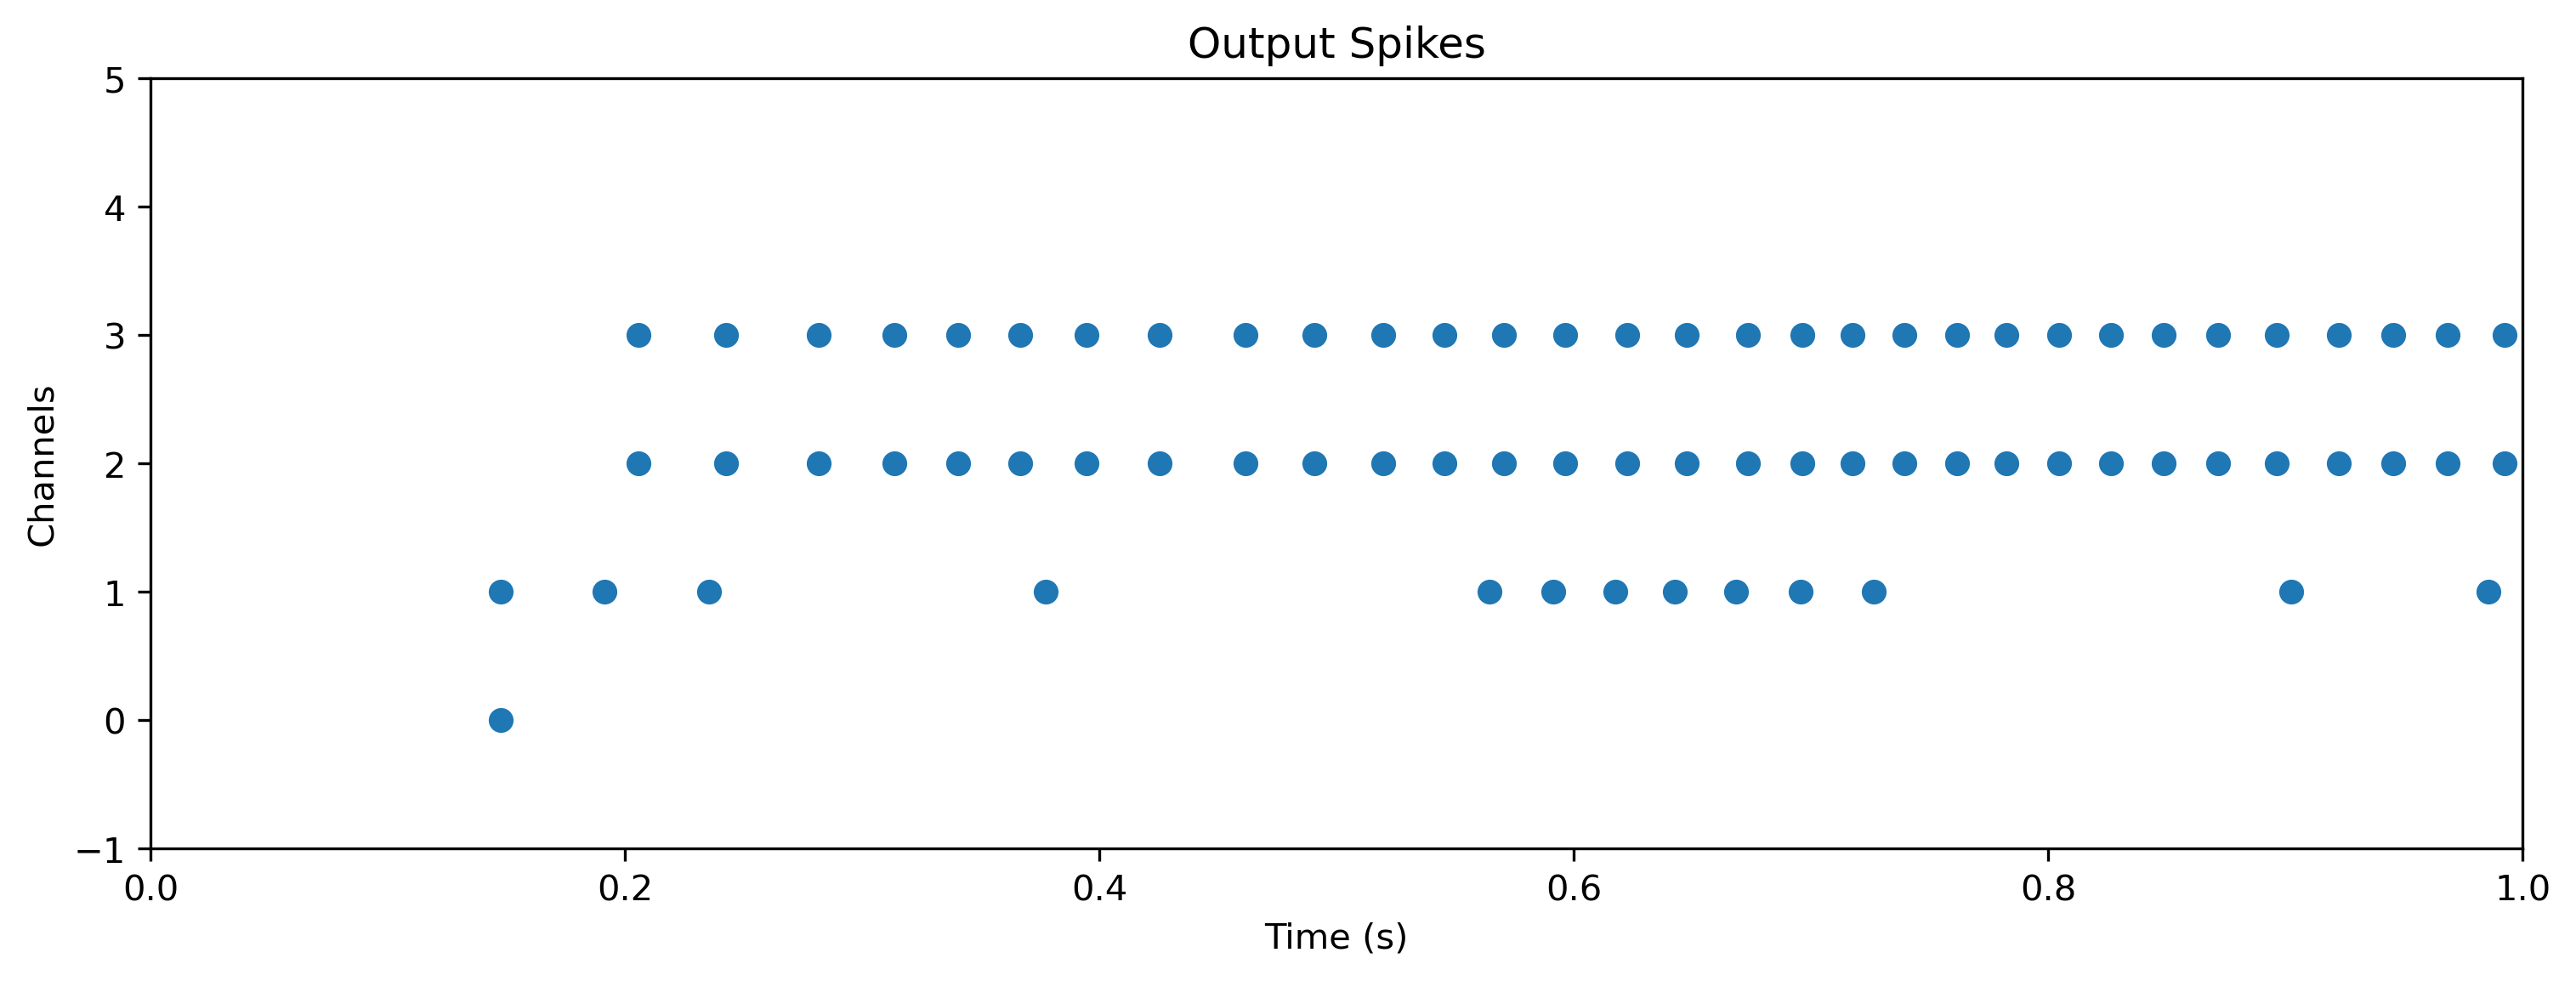

In [15]:
out_spikes, new_state, record_dict = modSE(input_ts.raster(dt = dt))
out = plot_out(out_spikes);

## Change just one parameter

In [ ]:
ampa = AMPAParameters(tau=1e-2)
sim_config = DynapSE1SimulationConfiguration(ampa=ampa)
modSE = DynapSE1NeuronSynapseJax(shape=(N,),sim_config=sim_config)